In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [49]:
# Read the data into a Pandas DataFrame
Hospital_infect_data = pd.read_csv('Resources/Healthcare_Associated_Infections_Hospital.csv')
Hospital_infect_data.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [50]:
# Get a brief summary of the dataframe.
Hospital_infect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

In [51]:
# Convert 'Score' column to numeric, coercing errors to NaN
Hospital_infect_data['Score'] = pd.to_numeric(Hospital_infect_data['Score'], errors='coerce')

# Check if 'Score' column conversion was successful
print(Hospital_infect_data['Score'].dtype)  # Should print 'float64' or 'int64'

float64


In [52]:
# Check for missing values
missing_values = Hospital_infect_data.isnull().sum()
missing_values

Provider ID                  0
Hospital Name                0
Address                      0
City                         0
State                        0
ZIP Code                     0
County Name                624
Phone Number                 0
Measure Name                 0
Measure ID                   0
Compared to National         0
Score                   124717
Footnote                 81180
Measure Start Date           0
Measure End Date             0
Location                     0
dtype: int64

In [53]:
# Check for duplicates in Uber data
duplicates = Hospital_infect_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Hospital_infect_data:", num_duplicates)

Number of duplicate rows in Hospital_infect_data: 0


In [54]:
# Get unique categories in 'Compared to National'
unique_Compared_National = Hospital_infect_data['Compared to National'].unique()

# Display the unique Compared to National
print("Unique Compared to National:")
print(unique_Compared_National)

Unique Compared to National:
['No Different than National Benchmark'
 'Worse than the National Benchmark' 'Better than the National Benchmark'
 'Not Available']


In [55]:
# Count the number of 'Not Available' entries
not_available_count = Hospital_infect_data[Hospital_infect_data['Compared to National'] == 'Not Available'].shape[0]
print(f"\nNumber of 'Not Available' entries: {not_available_count}")


Number of 'Not Available' entries: 121398


In [56]:
print(Hospital_infect_data['Measure Name'].unique())

# Count the number of unique measure names
num_unique_measure_names = Hospital_infect_data['Measure Name'].nunique()

print(f"Number of unique measure names: {num_unique_measure_names}")

['CLABSI: Lower Confidence Limit' 'CLABSI: Upper Confidence Limit'
 'CLABSI: Number of Procedures' 'CLABSI: Predicted Cases'
 'CLABSI: Observed Cases'
 'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards'
 'CLABSI Lower Confidence Limit' 'CLABSI Upper Confidence Limit'
 'CLABSI Central Line Days' 'CLABSI Predicted Cases'
 'CLABSI Observed Cases'
 'Central line-associated blood stream infections (CLABSI) in ICUs only'
 'CAUTI: Lower Confidence Limit' 'CAUTI: Upper Confidence Limit'
 'CAUTI: Number of Procedures' 'CAUTI: Predicted Cases'
 'CAUTI: Observed Cases'
 'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards'
 'CAUTI Lower Confidence Limit' 'CAUTI Upper Confidence Limit'
 'CAUTI Urinary Catheter Days' 'CAUTI Predicted Cases'
 'CAUTI Observed Cases'
 'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only'
 'SSI: Colon Lower Confidence Limit' 'SSI: Colon Upper Confidence Limit'
 'C.diff Patient Days' 'SSI: Colon, Nu

In [57]:
# Convert 'Measure End Date' to datetime
Hospital_infect_data['Measure End Date'] = pd.to_datetime(Hospital_infect_data['Measure End Date'], errors='coerce')

# Extract year from 'Measure End Date'
Hospital_infect_data['Year'] = Hospital_infect_data['Measure End Date'].dt.year

# Count the number of records per year
records_per_year = Hospital_infect_data['Year'].value_counts().sort_index()

print("Number of records per year:")
print(records_per_year)

Number of records per year:
Year
2015    222864
Name: count, dtype: int64


# ETA: Hospital Performance Compared to National Benchmarks

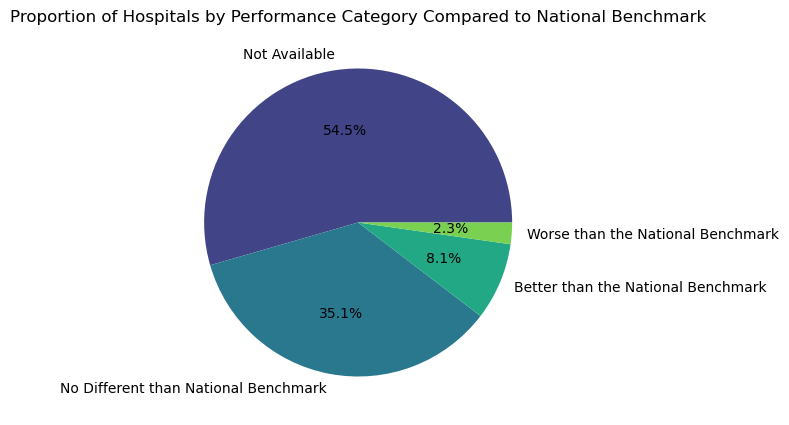

In [58]:
# Count the number of hospitals in each performance category
performance_counts = Hospital_infect_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Data cleaning needed since large portion of Not available data

# ETA-Measure-Specific Analysis

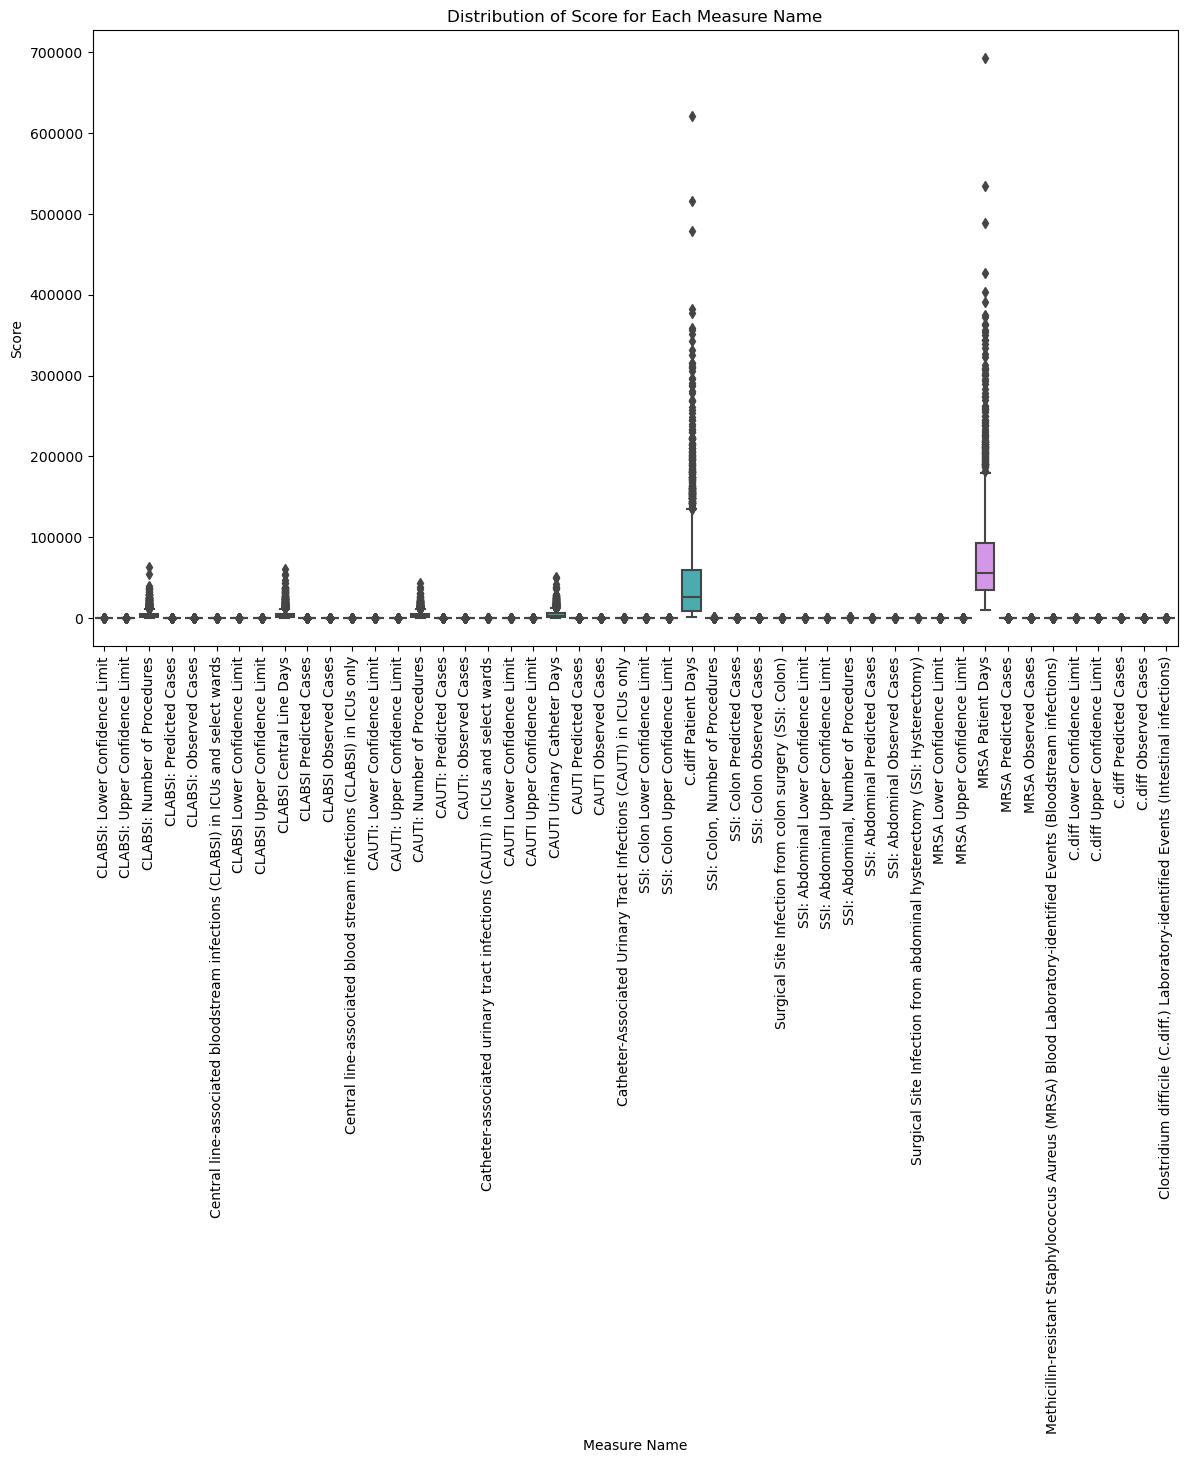

In [59]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = Hospital_infect_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=Hospital_infect_data)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


Data has outliers.

# ETA- Regional Trend

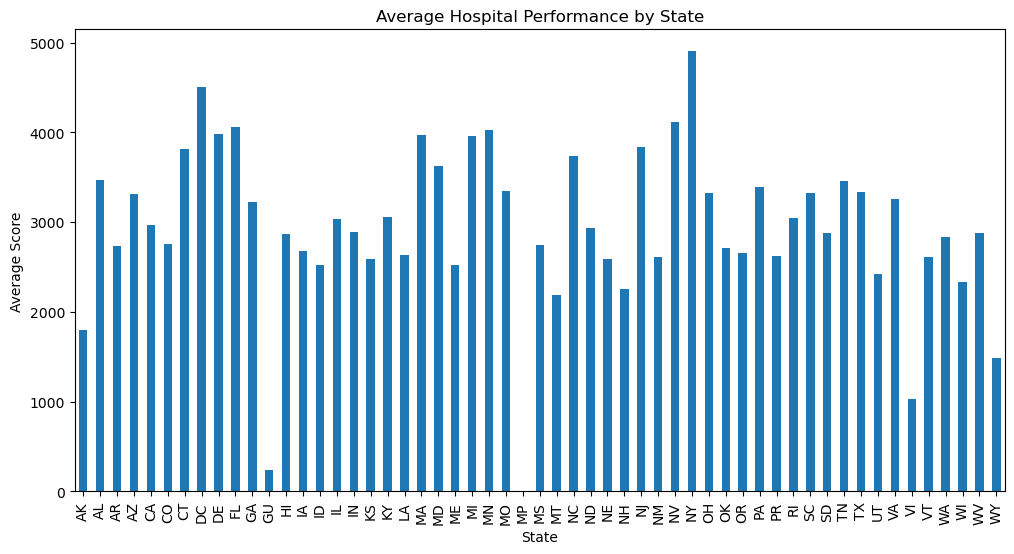

In [60]:
#Are hospitals in certain states performing better or worse than others? . High score poor management of infections.

state_performance = Hospital_infect_data.groupby('State')['Score'].mean()


plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar')
plt.title('Average Hospital Performance by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

Not availale data needed to be handled

# Data cleaning & data wrangling 

# Remove missing values

In [61]:
# Remove rows where 'Score' is missing
hospital_data_cleaned = Hospital_infect_data.dropna(subset=['Score'])

# Check the shape of the cleaned data
print(f"Data shape after removing missing scores: {hospital_data_cleaned.shape}")

# Optional: Check if there are any remaining missing values in 'Score'
print(f"Remaining missing values in 'Score': {hospital_data_cleaned['Score'].isna().sum()}")


Data shape after removing missing scores: (98147, 17)
Remaining missing values in 'Score': 0


In [62]:
# Remove rows where 'Compared to National' is 'Not Available'
hospital_data_filtered = hospital_data_cleaned[hospital_data_cleaned['Compared to National'] != 'Not Available']

# Check the shape of the filtered data
print(f"Data shape after removing 'Not Available' entries: {hospital_data_filtered.shape}")

# Optional: Check if there are any remaining 'Not Available' values
print(f"Remaining 'Not Available' entries: {hospital_data_filtered[hospital_data_filtered['Compared to National'] == 'Not Available'].shape[0]}")

Data shape after removing 'Not Available' entries: (98147, 17)
Remaining 'Not Available' entries: 0


In [63]:
hospital_data_filtered['Measure Name'] = hospital_data_filtered['Measure Name'].replace({
    'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards': 
    'CLABSI: CLABSI_ICUs&select wards',
    
    'CLABSI Lower Confidence Limit': 
    'CLABSI: Lower Confidence Limit',
    
    'CLABSI Upper Confidence Limit': 
    'CLABSI: Upper Confidence Limit',
    
    'CLABSI Central Line Days': 
    'CLABSI: Central Line Days',
    
    'CLABSI Predicted Cases': 
    'CLABSI: Predicted Cases',
    
    'CLABSI Observed Cases': 
    'CLABSI: Observed Cases',
    
    'Central line-associated blood stream infections (CLABSI) in ICUs only': 
    'CLABSI: CLABSI_ICUs only',
    
    'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards': 
    'CAUTI: CAUTI_ICUs&select wards',
    
    'CAUTI Lower Confidence Limit': 
    'CAUTI: CAUTI Lower Confidence Limit',
    
    'CAUTI Upper Confidence Limit': 
    'CAUTI: Upper Confidence Limit',
    
    'CAUTI Urinary Catheter Days': 
    'CAUTI: Urinary Catheter Days',
    
    'CAUTI Predicted Cases': 
    'CAUTI: Predicted Cases',
    
    'CAUTI Observed Cases': 
    'CAUTI: Observed Cases',
    
    'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only': 
    'CAUTI: CAUTI_ICUs only',
    
    'C.diff Patient Days': 
    'C.diff: C.diff Patient Days',
    
    'Surgical Site Infection from colon surgery (SSI: Colon)': 
    'SSI: Surgical Site_colon surgery',
    
    'Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)': 
    'SSI: SSI_Hysterectomy',
    
    'MRSA Lower Confidence Limit': 
    'MRSA: MRSA Lower Confidence Limit',
    
    'MRSA Upper Confidence Limit': 
    'MRSA: MRSA Upper Confidence Limit',
    
    'MRSA Patient Days': 
    'MRSA: Patient Days',
    
    'MRSA Predicted Cases': 
    'MRSA: Predicted Cases',
    
    'MRSA Observed Cases': 
    'MRSA: Observed Cases',
    
    'Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)': 
    'MRSA: MRSA_Blood_Laboratory-identified Events',
    
    'C.diff Lower Confidence Limit': 
    'C.diff: C.diff Lower Confidence Limit',
    
    'C.diff Upper Confidence Limit': 
    'C.diff: C.diff Upper Confidence Limit',
    
    'C.diff Predicted Cases': 
    'C.diff: C.diff Predicted Cases', 
    
    'C.diff Observed Cases': 
    'C.diff: C.diff Observed Cases',
    
    'Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)': 
    'C.diff: C.diff_Laboratory-identified Events'
})



In [64]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015


In [65]:
# split the Measure name col. 

# Split the 'Measure Name' column into 'Abbreviation' and 'Description'
hospital_data_filtered[['Infection', 'Measure']] = hospital_data_filtered['Measure Name'].str.split(': ', n=1, expand=True)



In [66]:
hospital_data_filtered['Compared to National'] = hospital_data_filtered['Compared to National'].replace({
    'No Different than National Benchmark': 'same',
    'Worse than the National Benchmark': 'worse',
    'Better than the National Benchmark': 'better'
})



In [67]:
# List of columns to drop
columns_to_drop = ['Footnote', 'Location', 'Category',]

# Drop the columns if they exist in the DataFrame
hospital_data_filtered = hospital_data_filtered.drop(columns=[col for col in columns_to_drop if col in hospital_data_filtered.columns])


In [68]:
# Ensure the 'Measure Start Date' and 'Measure End Date' columns are in datetime format
hospital_data_filtered['Measure Start Date'] = pd.to_datetime(hospital_data_filtered['Measure Start Date'])
hospital_data_filtered['Measure End Date'] = pd.to_datetime(hospital_data_filtered['Measure End Date'])

# Calculate the number of days between 'Measure Start Date' and 'Measure End Date'
hospital_data_filtered['Number of Measure Days'] = (hospital_data_filtered['Measure End Date'] - hospital_data_filtered['Measure Start Date']).dt.days

In [69]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Measure Start Date,Measure End Date,Year,Infection,Measure,Number of Measure Days
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,same,0.165,2015-01-01,2015-06-30,2015,CLABSI,Lower Confidence Limit,180
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,same,3.249,2015-01-01,2015-06-30,2015,CLABSI,Upper Confidence Limit,180
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,same,1485.000,2015-01-01,2015-06-30,2015,CLABSI,Number of Procedures,180
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,same,2.034,2015-01-01,2015-06-30,2015,CLABSI,Predicted Cases,180
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,same,2.000,2015-01-01,2015-06-30,2015,CLABSI,Observed Cases,180


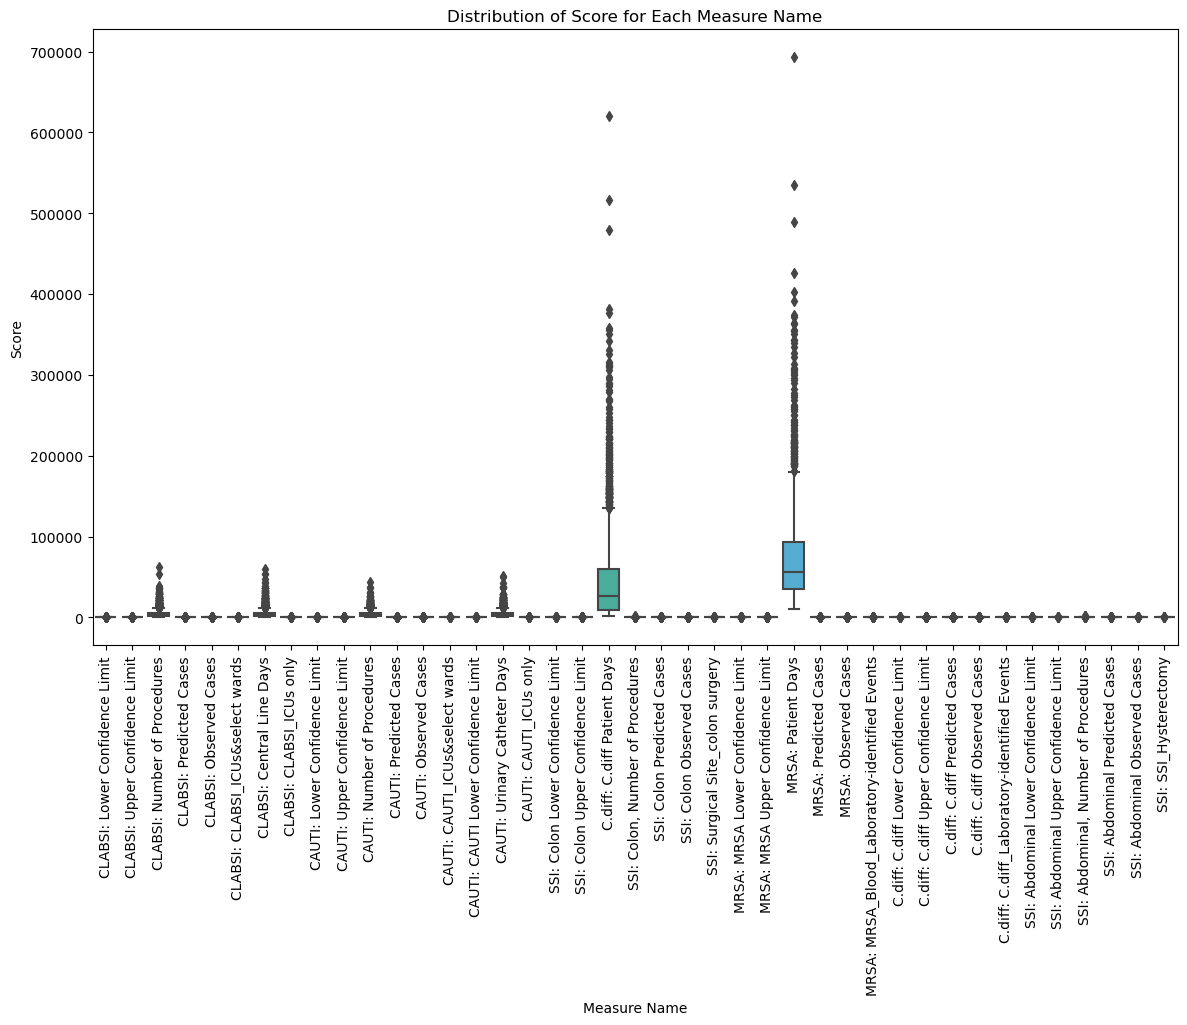

In [70]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = hospital_data_filtered.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=hospital_data_filtered)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


In [71]:
# Remove outliers
# Function to remove outliers based on the IQR
def remove_outliers(hospital_data_filtered, column):
    Q1 = hospital_data_filtered[column].quantile(0.25)
    Q3 = hospital_data_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return hospital_data_filtered[(hospital_data_filtered[column] >= lower_bound) & (hospital_data_filtered[column] <= upper_bound)]
# Apply the function to each group and combine the results back into a single DataFrame
cleaned_data = hospital_data_filtered.groupby(['Measure', 'Infection']).apply(lambda x: remove_outliers(x, 'Score')).reset_index(drop=True)

/var/folders/_b/93xtqrz559j5sdj7bxgvn69w0000gn/T/ipykernel_2053/4158529983.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data = hospital_data_filtered.groupby(['Measure', 'Infection']).apply(lambda x: remove_outliers(x, 'Score')).reset_index(drop=True)


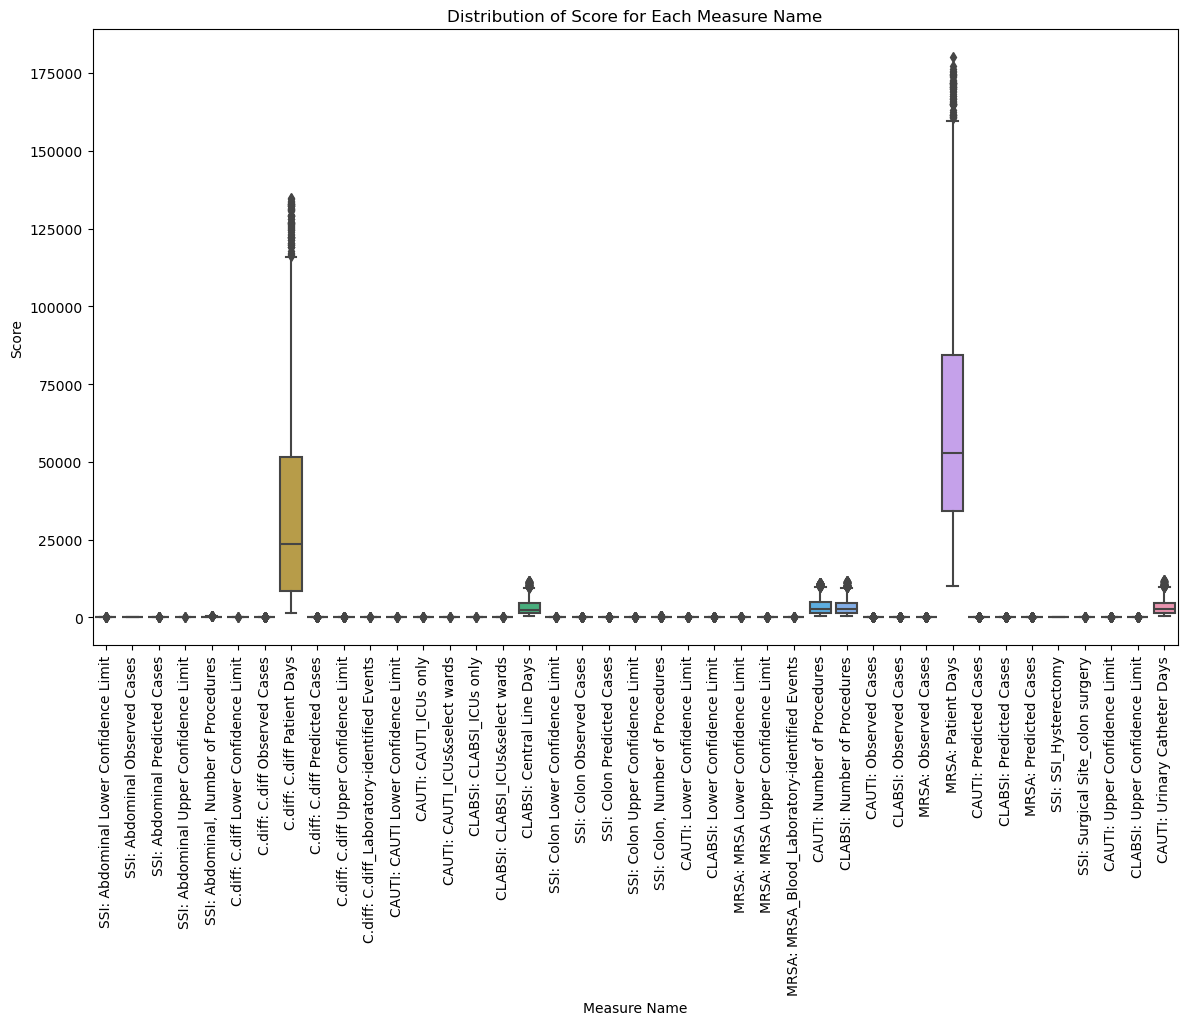

In [72]:
# Group by the 'Measure Name' column and describe the 'Score' column after removing outliers for each Measure Name
measure_name_distribution = cleaned_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=cleaned_data)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()

In [73]:
# Save the DataFrame to a CSV file
filename = 'hospital_data_cleaned.csv'
cleaned_data.to_csv(filename, index=False)

# Extract the data from above df to store in three tables for a database


In [74]:
# Extract Hospitals table
hospitals_df = cleaned_data[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']].drop_duplicates()

filename = 'hospital_df.csv'
hospitals_df.to_csv(filename, index=False)


In [77]:
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 0 to 44659
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provider ID    3288 non-null   int64 
 1   Hospital Name  3288 non-null   object
 2   Address        3288 non-null   object
 3   City           3288 non-null   object
 4   State          3288 non-null   object
 5   ZIP Code       3288 non-null   int64 
 6   County Name    3282 non-null   object
 7   Phone Number   3288 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 231.2+ KB


In [78]:
# Extract Measures table
measures_df = cleaned_data[['Measure ID', 'Measure Name', 'Infection', 'Measure Start Date', 'Measure End Date','Compared to National', 'Score','Provider ID']].drop_duplicates()

filename = 'measure_score_df.csv'
measures_df.to_csv(filename, index=False)

In [79]:
measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92534 entries, 0 to 92533
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Measure ID            92534 non-null  object        
 1   Measure Name          92534 non-null  object        
 2   Infection             92534 non-null  object        
 3   Measure Start Date    92534 non-null  datetime64[ns]
 4   Measure End Date      92534 non-null  datetime64[ns]
 5   Compared to National  92534 non-null  object        
 6   Score                 92534 non-null  float64       
 7   Provider ID           92534 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 5.6+ MB


# Perform ETA again and perform Data Analysis

# Hospital performance Compared to National Benchmarks:

In [80]:
# Categorize hospitals into 'Better', 'Worse', or 'Same' based on performance compared to national benchmarks
performance_categories = cleaned_data['Compared to National'].value_counts()
print(performance_categories)

# Group by performance category and count the number of hospitals in each category
performance_group = cleaned_data.groupby('Compared to National')['Measure ID'].count()
print(performance_group)

Compared to National
same      72999
better    15830
worse      3705
Name: count, dtype: int64
Compared to National
better    15830
same      72999
worse      3705
Name: Measure ID, dtype: int64


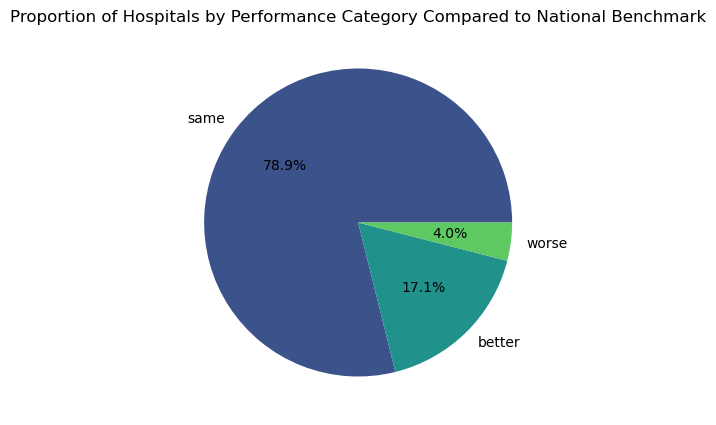

In [81]:
# Count the number of hospitals in each performance category
performance_counts = cleaned_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Results: Larger proprtion of hospital perform same as national benchmark

# How various measures are performing compared to national standards?

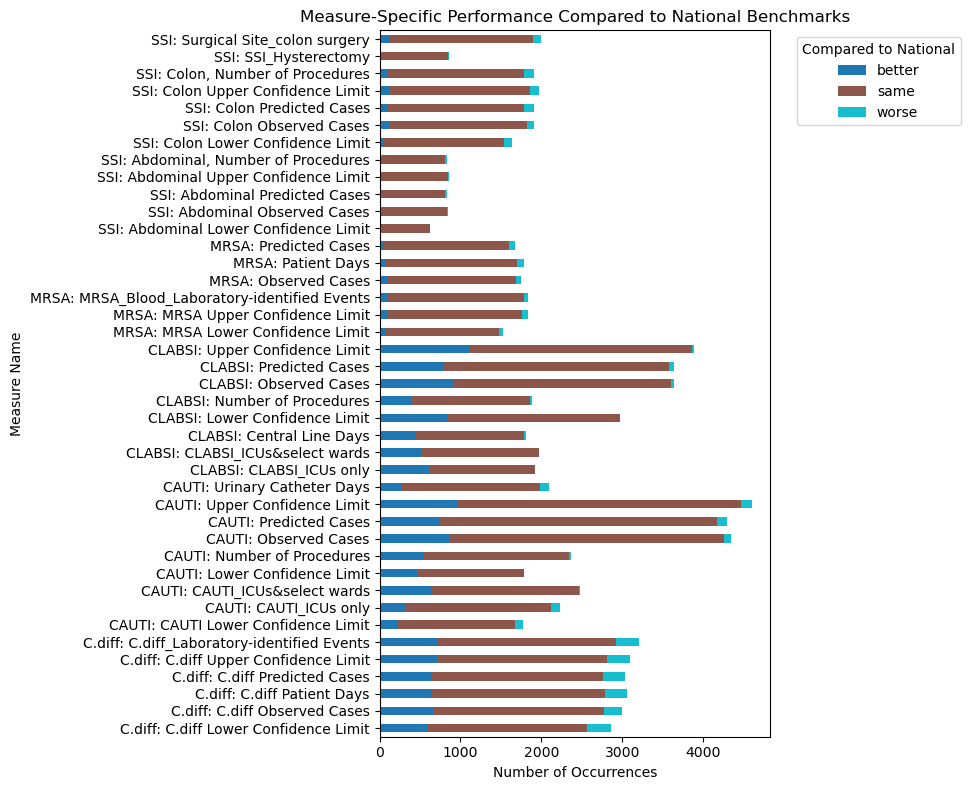

In [82]:
# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Plot the horizontal stacked bar chart
measure_performance.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='tab10')

# Add title and labels
plt.title('Measure-Specific Performance Compared to National Benchmarks')
plt.xlabel('Number of Occurrences')
plt.ylabel('Measure Name')

# Add legend
plt.legend(title='Compared to National', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

Null Hypothesis (H₀): Hospital performance (better, same, worse) is independent of the infection control measure. 
Alternative Hypothesis (H₁): Hospital performance (better, same, worse) is dependent on the infection control measure. 

In [83]:
from scipy.stats import chi2_contingency

# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(measure_performance)

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 7296.940041482146
P-value: 0.0


Results: reject the null hypothesis. Type of measure significantly influences how hospitals perform compared to national benchmarks

# Proportion of Different Major Infection Measures

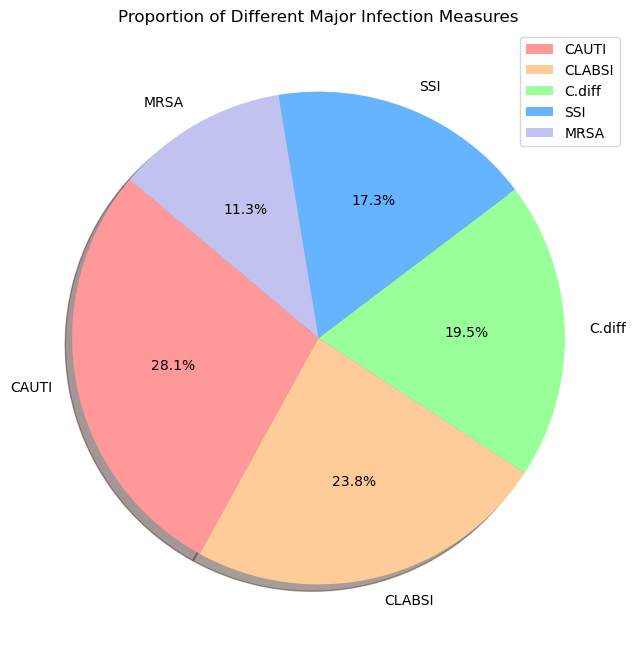

In [87]:
# Loop through each row and assign categories based on keywords
for index, row in hospital_data_filtered.iterrows():
    if 'CLABSI' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'CLABSI'
    elif 'CAUTI' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'CAUTI'
    elif 'SSI' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'SSI'
    elif 'MRSA' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'MRSA'
    elif 'C.diff' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'C.diff'

# Calculate the value counts for each major category
category_counts =hospital_data_filtered['Major Category'].value_counts()

# Plotting the pie chart for the significant categories
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True, colors=['#ff9999', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6'])
plt.title('Proportion of Different Major Infection Measures')
plt.legend()
plt.ylabel('')
plt.show()

# Top-performing healthcare providers Analysis
#### The national benchmark measurements for hospital infection control are largely based on data from the National Healthcare Safety Network (NHSN), managed by the Centers for Disease Control and Prevention (CDC). The primary metric used is the Standardized Infection Ratio (SIR), which compares the number of observed healthcare-associated infections (HAIs) in hospitals to the number predicted based on national data, adjusted for risk factors like patient population and hospital characteristics. 
##### The SIR uses a baseline as the national standard. A SIR of 1 means the number of observed infections is equal to the predicted number. Scores lower than 1 indicate better performance (fewer infections than predicted), while scores higher than 1 indicate worse performance (more infections than predicted).

## Slice Measure ID of SIR to compare

In [84]:
# Filter the data for Measure IDs that are relevant to SIR (HAI_1_SIR to HAI_6_SIR)
sir_measure_ids = ['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']
sir_data = hospital_data_filtered[hospital_data_filtered['Measure ID'].isin(sir_measure_ids)]

# Slice the data to include Hospital ID, Hospital Name, Address, and Measure ID
sir_data_slice = sir_data[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Measure ID', 'Measure Name', 'Score']]
sir_data_slice.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure ID,Measure Name,Score
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_1_SIR,CLABSI: CLABSI_ICUs&select wards,0.983
11,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_1a_SIR,CLABSI: CLABSI_ICUs only,3.189
17,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_2_SIR,CAUTI: CAUTI_ICUs&select wards,0.514
23,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_2a_SIR,CAUTI: CAUTI_ICUs only,0.487
30,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_3_SIR,SSI: Surgical Site_colon surgery,0.358


In [85]:
# Create a new column categorizing performance based on SIR
sir_data_slice['Performance'] = np.where(sir_data_slice['Score'] < 1, 'Better', 
                                         np.where(sir_data_slice['Score'] > 1, 'Worse', 'Same'))
# Present first 5 rows
sir_data_slice.head()

/var/folders/_b/93xtqrz559j5sdj7bxgvn69w0000gn/T/ipykernel_2053/1208161724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sir_data_slice['Performance'] = np.where(sir_data_slice['Score'] < 1, 'Better',


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure ID,Measure Name,Score,Performance
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_1_SIR,CLABSI: CLABSI_ICUs&select wards,0.983,Better
11,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_1a_SIR,CLABSI: CLABSI_ICUs only,3.189,Worse
17,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_2_SIR,CAUTI: CAUTI_ICUs&select wards,0.514,Better
23,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_2a_SIR,CAUTI: CAUTI_ICUs only,0.487,Better
30,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_3_SIR,SSI: Surgical Site_colon surgery,0.358,Better


# Performance based on SIR Scores across Different Measures

Top 5 better performance measures are:
CLABSI: CLABSI_ICUs only
CAUTI: CAUTI_ICUs&select wards
CLABSI: CLABSI_ICUs&select wards
CAUTI: CAUTI_ICUs only
SSI: SSI_Hysterectomy


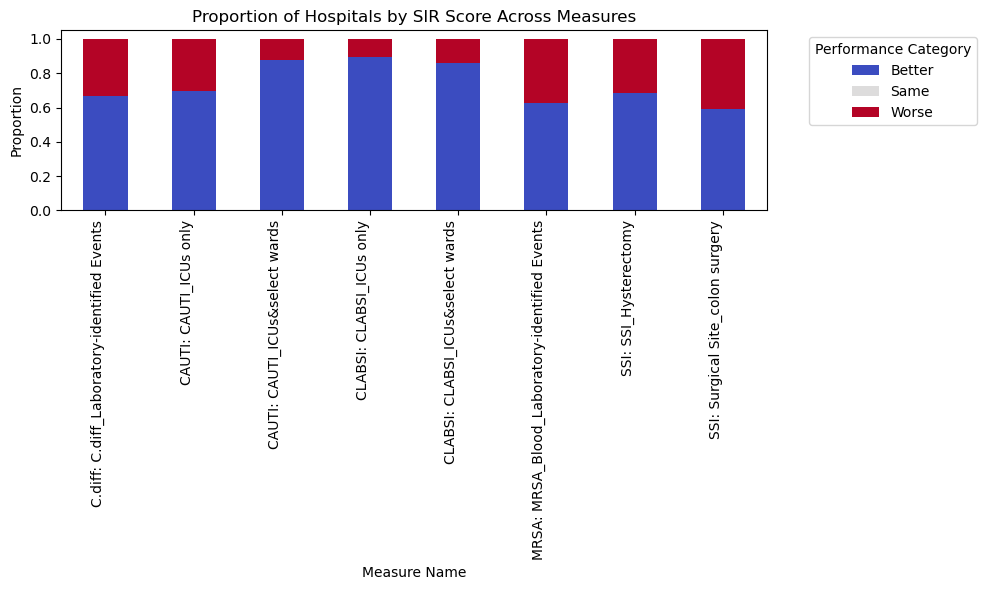

In [88]:
# Count the proportion of hospitals for each performance category and measure name
benchmark_data_sir = sir_data_slice.groupby(['Measure Name', 'Performance'])['Provider ID'].count().unstack().fillna(0)

# Normalize to get proportions
benchmark_data_sir = benchmark_data_sir.div(benchmark_data_sir.sum(axis=1), axis=0)

# Sort measures by the "Better" performance category to find the top 5
top_5_better_measures = benchmark_data_sir.sort_values(by='Better', ascending=False).head(5)

# Print the top 5 better performance measures
print("Top 5 better performance measures are:")
for measure in top_5_better_measures.index:
    print(measure)

# Plot the bar chart showing the proportion of hospitals for each performance category
benchmark_data_sir.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Hospitals by SIR Score Across Measures')
plt.xlabel('Measure Name')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Performance based on SIR Score across All States

Top 5 states with the highest number of 'Better' performing hospitals are:
1. CA
2. TX
3. FL
4. NY
5. PA


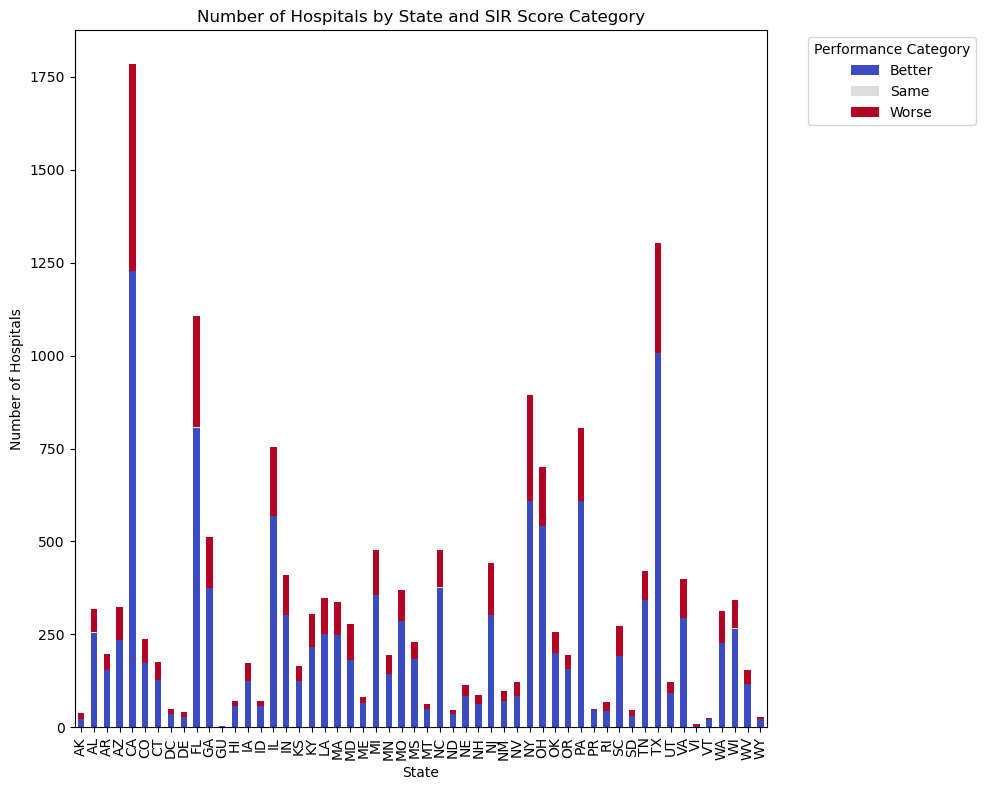

In [89]:
# Count the number of hospitals for each state and performance category
state_performance = sir_data_slice.groupby(['State', 'Performance'])['Provider ID'].count().unstack().fillna(0)

# Sort the states by the "Better" performance category to find the top 5
top_5_states = state_performance.sort_values(by='Better', ascending=False).head(5)

# Print the top 5 states
print("Top 5 states with the highest number of 'Better' performing hospitals are:")
for i, state in enumerate(top_5_states.index, start=1):
    print(f"{i}. {state}")

# Plot the bar chart showing the number of hospitals by state and SIR performance category
state_performance.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='coolwarm')
plt.title('Number of Hospitals by State and SIR Score Category')
plt.xlabel('State')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=90)
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [90]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(sir_data_slice['State'], sir_data_slice['Performance'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
# print("Expected Frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("There is a significant association between hospital performance and the state (reject the null hypothesis).")
else:
    print("There is no significant association between hospital performance and the state (fail to reject the null hypothesis).")

Chi-Square Statistic: 228.04580873784386
p-value: 6.25663098717331e-11
Degrees of Freedom: 106
There is a significant association between hospital performance and the state (reject the null hypothesis).


In [91]:
# Filter the data for hospitals in California (CA)
california_hospitals = sir_data_slice[sir_data_slice['State'] == 'CA']

# Exclude hospitals with a SIR score of 0 or NaN
california_hospitals_nonzero = california_hospitals[(california_hospitals['Score'] > 0) & california_hospitals['Score'].notna()]

# Sort the remaining hospitals by SIR score (lower is better) and select the top 5
top_5_hospitals_ca = california_hospitals_nonzero.sort_values('Score').head(5)

# Print the top 5 hospitals in California with non-zero SIR scores
print("Top 5 hospitals in California:")
print(top_5_hospitals_ca[['Hospital Name', 'Score']])

Top 5 hospitals in California:
                                            Hospital Name  Score
150734                             DOCTORS MEDICAL CENTER  0.058
53977              ST JOSEPH'S MEDICAL CENTER OF STOCKTON  0.061
31020                              DOCTORS MEDICAL CENTER  0.073
117305             ST JOSEPH'S MEDICAL CENTER OF STOCKTON  0.079
91822   RIVERSIDE UNIVERSITY HEALTH SYSTEM-MEDICAL CENTER  0.081


# Comparison of SIR Scores for Top 5 Hospitals in California across All Measures

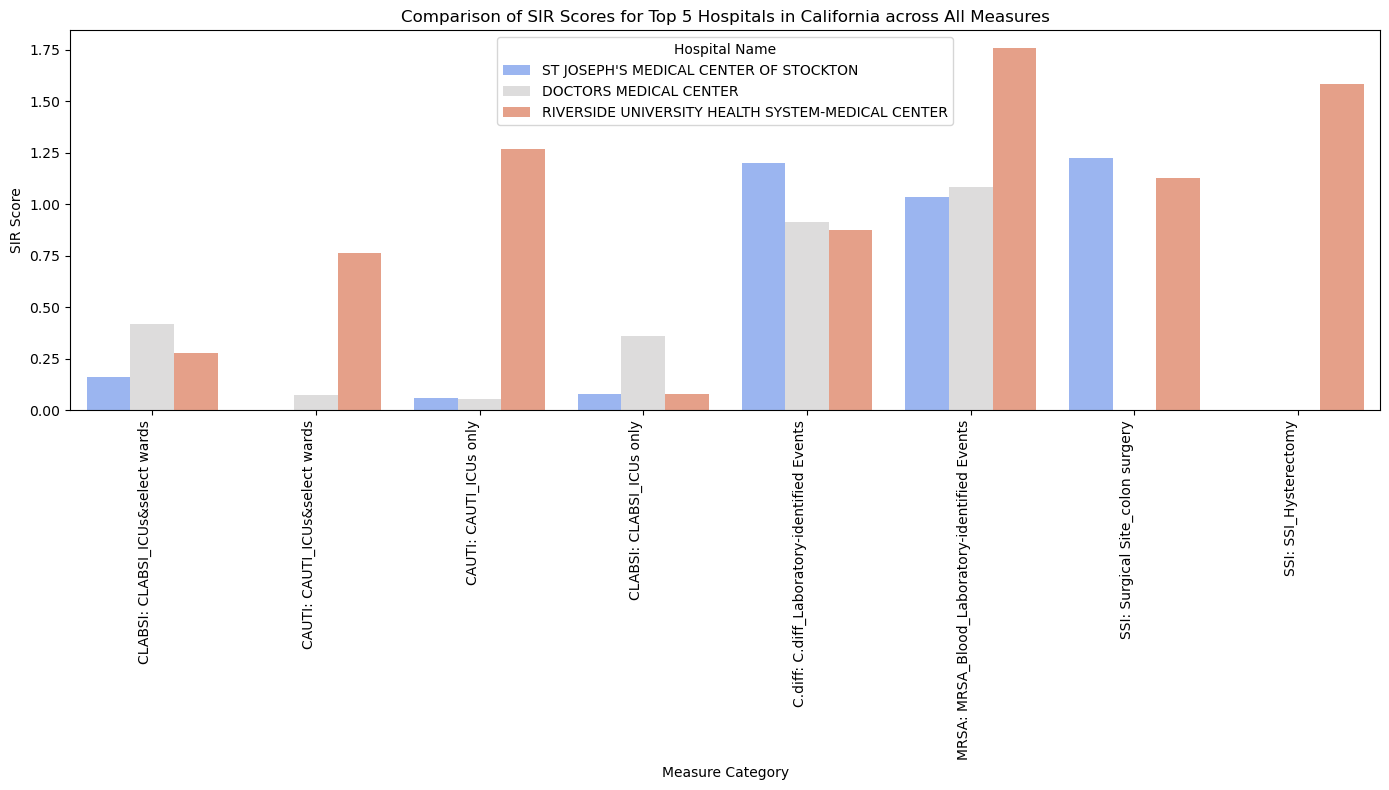

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for hospitals in California (CA)
california_hospitals = sir_data_slice[sir_data_slice['State'] == 'CA']

# Exclude hospitals with a SIR score of 0 or NaN
california_hospitals_nonzero = california_hospitals[(california_hospitals['Score'] > 0) & california_hospitals['Score'].notna()]

# Sort the remaining hospitals by SIR score (lower is better) and select the top 5
top_5_hospitals_ca = california_hospitals_nonzero.sort_values('Score').head(5)

# Filter the data for the top 5 hospitals across all measures
filtered_data_all_measures = california_hospitals_nonzero[california_hospitals_nonzero['Provider ID'].isin(top_5_hospitals_ca['Provider ID'])]

# Plot the compared bar chart for each hospital across all measures
plt.figure(figsize=(14, 8))

# Create a bar plot where x-axis is 'Measure Name', y-axis is 'SIR Score', and hue is 'Hospital Name'
sns.barplot(x='Measure Name', y='Score', hue='Hospital Name', data=filtered_data_all_measures, palette='coolwarm')

# Customize the plot
plt.title('Comparison of SIR Scores for Top 5 Hospitals in California across All Measures')
plt.xlabel('Measure Category')
plt.ylabel('SIR Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Hospital Name')
plt.tight_layout()

# Show the plot
plt.show()

# Key Findings
##### General Observations:
1. ST JOSEPH'S MEDICAL CENTER OF STOCKTON: Consistently achieves low SIR scores across almost all measures.
This hospital has excellent performance in measures such as:
- CLABSI (ICUs & select wards): Very low SIR score compared to others.
- CAUTI (ICUs only): Best performance with the lowest score.

Other hospitals can potentially follow their protocols for central line-associated bloodstream infections and catheter-associated infections in ICUs and wards.

2. DOCTORS MEDICAL CENTER: Performs well in CAUTI (ICUs & select wards) and CLABSI (ICUs only).
Slightly higher scores in SSI (Surgical Site Infection) measures, particularly for hysterectomy and colon surgery.
Hospitals struggling with catheter infections could consider adopting Doctors Medical Center’s protocols for CAUTI and CLABSI in ICUs.

3. RIVERSIDE UNIVERSITY HEALTH SYSTEM-MEDICAL CENTER: Has high SIR scores across several measures, including:
- C.diff Laboratory-identified Events.
- MRSA Blood Laboratory-identified Events.
- SSI (Surgical Site Infections) for both colon surgery and hysterectomy.

This suggests that Riverside University Health System might need to improve their protocols for managing C.diff, MRSA, and SSI, which are critical measures where infection rates seem higher than the expected benchmark.

# Find Overlapped Top Performance Hospitals Nationalwide

In [93]:
# Filter for California hospitals and get the top 5 based on SIR scores
california_hospitals = sir_data_slice[sir_data_slice['State'] == 'CA']
california_hospitals_nonzero = california_hospitals[(california_hospitals['Score'] > 0) & california_hospitals['Score'].notna()]
top_5_hospitals_ca = california_hospitals_nonzero.sort_values('Score').head(5)

# Get the top 5 hospitals across all states (general top 5)
all_hospitals_nonzero = sir_data_slice[(sir_data_slice['Score'] > 0) & sir_data_slice['Score'].notna()]
top_5_hospitals_all_states = all_hospitals_nonzero.sort_values('Score').head(5)

# Check for overlap by hospital name or provider ID
overlapping_hospitals = top_5_hospitals_all_states[top_5_hospitals_all_states['Hospital Name'].isin(top_5_hospitals_ca['Hospital Name'])]

# Print results
if not overlapping_hospitals.empty:
    print("Overlapping hospitals found between top 5 hospitals in California and the general top 5 hospitals:")
    print(overlapping_hospitals[['Hospital Name', 'State']])
else:
    print("No overlapping hospitals found between top 5 hospitals in California and the general top 5 hospitals.")

No overlapping hospitals found between top 5 hospitals in California and the general top 5 hospitals.


# Top 3 hospitals with the best SIR performance (combined from California and general top 5)

In [94]:
# Filter for California hospitals and get the top 5 based on SIR scores
california_hospitals = sir_data_slice[sir_data_slice['State'] == 'CA']
california_hospitals_nonzero = california_hospitals[(california_hospitals['Score'] > 0) & california_hospitals['Score'].notna()]
top_5_hospitals_ca = california_hospitals_nonzero.sort_values('Score').head(5)

# Get the top 5 hospitals across all states (general top 5)
all_hospitals_nonzero = sir_data_slice[(sir_data_slice['Score'] > 0) & sir_data_slice['Score'].notna()]
top_5_hospitals_all_states = all_hospitals_nonzero.sort_values('Score').head(5)

# Combine the two lists of hospitals (top 5 in California and top 5 in general)
combined_top_10 = pd.concat([top_5_hospitals_ca, top_5_hospitals_all_states])

# Remove duplicates (if any) to avoid counting the same hospital twice
combined_top_10 = combined_top_10.drop_duplicates(subset='Hospital Name')

# Sort the combined list by SIR score and select the top 3 hospitals with the best performance
top_3_hospitals = combined_top_10.sort_values('Score').head(3)

# Print the top 3 hospitals with the best performance
print("Top 3 hospitals with the best SIR performance (combined from California and general top 5):")
print(top_3_hospitals[['Hospital Name', 'State', 'Score']])


Top 3 hospitals with the best SIR performance (combined from California and general top 5):
                                    Hospital Name State  Score
62087                ST FRANCIS HEALTH CENTER INC    KS  0.038
93944       NORTHEAST GEORGIA MEDICAL CENTER, INC    GA  0.046
8087   ST ROSE DOMINICAN HOSPITALS - SIENA CAMPUS    NV  0.051


# Comparison of SIR Scores Across All Measures for Top 3 Hospitals Nationalwide

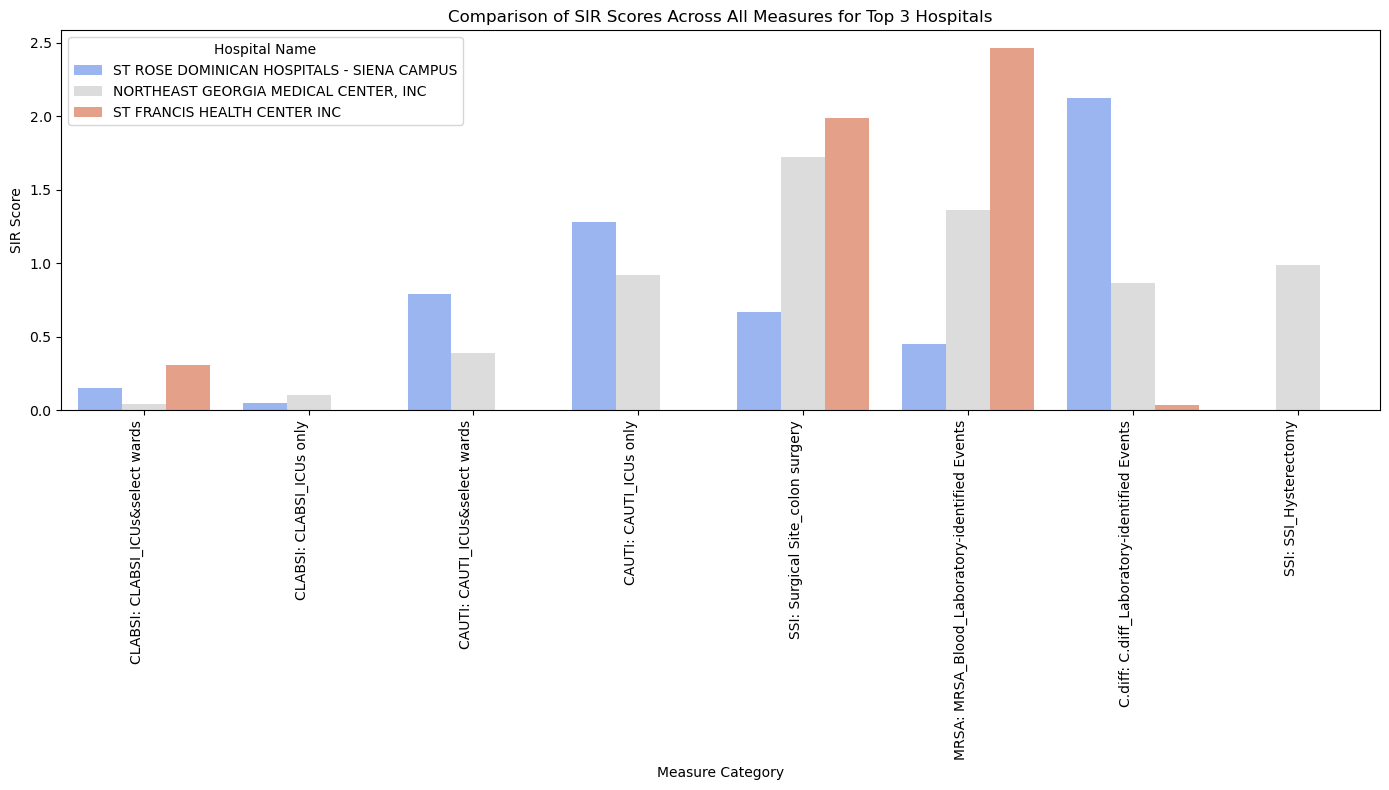

In [95]:
# Filter for California hospitals and get the top 5 based on SIR scores
california_hospitals = sir_data_slice[sir_data_slice['State'] == 'CA']
california_hospitals_nonzero = california_hospitals[(california_hospitals['Score'] > 0) & california_hospitals['Score'].notna()]
top_5_hospitals_ca = california_hospitals_nonzero.sort_values('Score').head(5)

# Get the top 5 hospitals across all states (general top 5)
all_hospitals_nonzero = sir_data_slice[(sir_data_slice['Score'] > 0) & sir_data_slice['Score'].notna()]
top_5_hospitals_all_states = all_hospitals_nonzero.sort_values('Score').head(5)

# Combine the two lists of hospitals (top 5 in California and top 5 in general)
combined_top_10 = pd.concat([top_5_hospitals_ca, top_5_hospitals_all_states])

# Remove duplicates (if any) to avoid counting the same hospital twice
combined_top_10 = combined_top_10.drop_duplicates(subset='Hospital Name')

# Sort the combined list by SIR score and select the top 3 hospitals with the best performance
top_3_hospitals = combined_top_10.sort_values('Score').head(3)

# Filter the data for the top 3 hospitals
top_3_hospitals_data = sir_data_slice[sir_data_slice['Hospital Name'].isin(top_3_hospitals['Hospital Name'])]

# Plot a bar chart comparing the SIR scores across all measures for the top 3 hospitals
plt.figure(figsize=(14, 8))

# Create a bar plot where x-axis is 'Measure Name', y-axis is 'SIR Score', and hue is 'Hospital Name'
sns.barplot(x='Measure Name', y='Score', hue='Hospital Name', data=top_3_hospitals_data, palette='coolwarm')

# Customize the plot
plt.title('Comparison of SIR Scores Across All Measures for Top 3 Hospitals')
plt.xlabel('Measure Category')
plt.ylabel('SIR Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Hospital Name')
plt.tight_layout()

# Show the plot
plt.show()

# Regional Performance Compared to National Benchmarks

Is there a significant association between regions (states) and performance categories of hosital (better, same, worse)

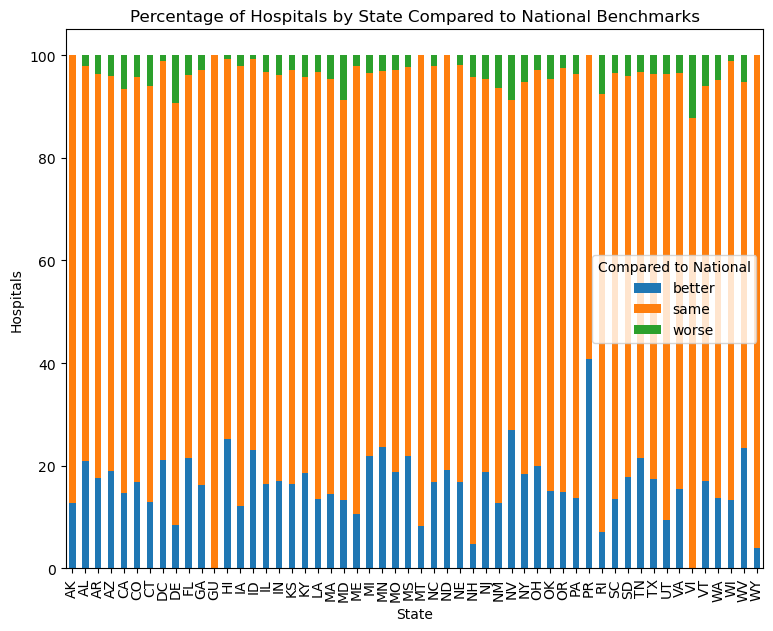

In [43]:
# Group by state and performance compared to national benchmarks
state_performance = cleaned_data.groupby(['State', 'Compared to National'])['Measure ID'].count().unstack().fillna(0)

# Calculate percentage distribution
state_performance_percentage = state_performance.div(state_performance.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = state_performance_percentage.plot(kind='bar', stacked=True, figsize=(9, 7))

plt.title('Percentage of Hospitals by State Compared to National Benchmarks')
plt.xlabel('State')
plt.ylabel('Hospitals')
plt.legend(title='Compared to National')
plt.xticks(rotation=90)
plt.show()

In [44]:
# perform chisqure
from scipy.stats import chi2_contingency

# Create a contingency table (State vs. Compared to National)
contingency_table = pd.crosstab(cleaned_data['State'], cleaned_data['Compared to National'])

# Apply the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1509.029378110796
P-value: 1.2063481521333772e-246


Results: Hospital performance (better, same, worse) is significantly associated with the state the hospital is in.